In [1]:
# code for loading the format for the notebook
import os

# path : store the current path to convert back to it later
path = os.getcwd()
os.chdir('../../notebook_format')
from formats import load_style
load_style()

In [2]:
os.chdir(path)
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Softmax Regression

**Softmax Regression** (synonyms: *Multinomial Logistic*, *Maximum Entropy Classifier*, or just *Multi-class Logistic Regression*) is a generalization of logistic regression that we can use for multi-class classification (under the assumption that the classes are  mutually exclusive). In contrast, we use the (standard) *Logistic Regression* model in binary classification tasks.

In **Softmax Regression**, we replace the sigmoid logistic function by the so-called *softmax* function $\phi_{softmax}(\cdot)$.

$$P(y=j \mid z^{(i)}) = \phi_{softmax}(z^{(i)}) = \frac{e^{z^{(i)}}}{\sum_{j=1}^{k} e^{z_{j}^{(i)}}}$$

where we define the net input *z* as 

$$z = w_1x_1 + ... + w_mx_m  + b= \sum_{l=1}^{m} w_l x_l + b= \mathbf{w}^T\mathbf{x} + b$$ 

(**w** is the weight vector, $\mathbf{x}$ is the feature vector of 1 training sample. Each $w$ corresponds to a feature $x$ and there're $m$ of them in total. $b$ is the bias unit. $k$ denotes the total number of classes.)   

Now, this softmax function computes the probability that the $i_{th}$ training sample $\mathbf{x}^{(i)}$ belongs to class $l$ given the weight and net input $z^{(i)}$. So, we compute the probability $p(y = j \mid \mathbf{x^{(i)}; w}_j) $ for each class label in $j = 1, \ldots, k$. Note the normalization term in the denominator which causes these class probabilities to sum up to one.

![](softmax.png)

To illustrate the concept of softmax, let us walk through a concrete example. Suppose we have a training set consisting of 4 samples from 3 different classes (0, 1, and 2)

- $x_0 \rightarrow \text{class }0$
- $x_1 \rightarrow \text{class }1$
- $x_2 \rightarrow \text{class }2$
- $x_3 \rightarrow \text{class }2$

First, we apply one-hot encoding to encode the class labels into a format that we can more easily work with.

In [3]:
y = np.array([ 0, 1, 2, 2 ])

def one_hot_encode(y):
    class_num = np.unique(y).shape[0]
    y_encode = np.zeros( ( y.shape[0], class_num ) )
    for idx, val in enumerate(y):
        y_encode[ idx, val ] = 1.0
    
    return y_encode

y_encode = one_hot_encode(y)
y_encode

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

A sample that belongs to class 0 (the first row) has a 1 in the first cell, a sample that belongs to class 1 has a 1 in the second cell of its row, and so forth.

Next, let us define the feature matrix of our 4 training samples. Here, we assume that our dataset consists of 2 features; thus, we create a 4x2 dimensional matrix of our samples and features.
Similarly, we create a 2x3 dimensional weight matrix (one row per feature and one column for each class).

In [4]:
X = np.array([[0.1, 0.5],
              [1.1, 2.3],
              [-1.1, -2.3],
              [-1.5, -2.5]])

W = np.array([[0.1, 0.2, 0.3],
              [0.1, 0.2, 0.3]])

bias = np.array([0.01, 0.1, 0.1])

print('Inputs X:\n', X)
print('\nWeights W:\n', W)
print('\nbias:\n', bias)

Inputs X:
 [[ 0.1  0.5]
 [ 1.1  2.3]
 [-1.1 -2.3]
 [-1.5 -2.5]]

Weights W:
 [[ 0.1  0.2  0.3]
 [ 0.1  0.2  0.3]]

bias:
 [ 0.01  0.1   0.1 ]


To compute the net input, we multiply the 4x2 matrix feature matrix `X` with the 2x3 (n_features x n_classes) weight matrix `W`, which yields a 4x3 output matrix (n_samples x n_classes) to which we then add the bias unit: 

$$\mathbf{Z} = \mathbf{X}\mathbf{W} + \mathbf{b}$$

In [5]:
def net_input( X, W, b ):
    return X.dot(W) + b

net_in = net_input( X, W, bias )
print('net input:\n', net_in)

net input:
 [[ 0.07  0.22  0.28]
 [ 0.35  0.78  1.12]
 [-0.33 -0.58 -0.92]
 [-0.39 -0.7  -1.1 ]]


Now, it's time to compute the softmax activation that we discussed earlier:

$$P(y=j \mid z^{(i)}) = \phi_{softmax}(z^{(i)}) = \frac{e^{z^{(i)}}}{\sum_{j=1}^{k} e^{z_{j}^{(i)}}}$$

In [6]:
def softmax(z):
    return np.exp(z) / np.sum( np.exp(z), axis = 1, keepdims = True )

smax = softmax(net_in)
print('softmax:\n', smax)

softmax:
 [[ 0.29450637  0.34216758  0.36332605]
 [ 0.21290077  0.32728332  0.45981591]
 [ 0.42860913  0.33380113  0.23758974]
 [ 0.44941979  0.32962558  0.22095463]]


As we can see, the values for each sample (row) nicely sum up to 1 now. E.g., we can say that the first sample  `[ 0.29450637  0.34216758  0.36332605]` has a 29.45% probability to belong to class 0. Now, in order to turn these probabilities back into class labels, we could simply take the argmax-index position of each row:

[[ 0.29450637  0.34216758  **0.36332605**] -> 2   
[ 0.21290077  0.32728332  **0.45981591**]  -> 2  
[ **0.42860913**  0.33380113  0.23758974]  -> 0  
[ **0.44941979**  0.32962558  0.22095463]] -> 0  

In [7]:
def to_classlabel(z):
    return z.argmax( axis = 1 )

print( 'predicted class labels: ', to_classlabel(smax) )

predicted class labels:  [2 2 0 0]


As we can see, our predictions are terribly wrong, since the correct class labels are `[0, 1, 2, 2]`. Now, in order to train our logistic model (e.g., via an optimization algorithm such as gradient descent), we need to define a cost function $J(\cdot)$ that we want to minimize:

$$J(\mathbf{W}; \mathbf{b}) = \frac{1}{n} \sum_{i=1}^{n} H( T^{(i)}, O^{(i)} )$$

which is the average of all cross-entropies over our $n$ training samples. The cross-entropy  function is defined as

$$H( T^{(i)}, O^{(i)} ) = -\sum_m T^{(i)} \cdot log(O^{(i)})$$

Where:

- $T$ stands for "target" (i.e., the *true* class labels) 
- $O$ stands for output -- the computed *probability* via softmax; **not** the predicted class label.
- $\sum_m$ denotes adding up the difference between the target and the output for all features.

In [8]:
def cross_entropy_cost( output, y_target ):
    return np.mean( -np.sum( np.log(output) * y_target, axis = 1 ) )

cost = cross_entropy_cost( output = smax, y_target = y_encode )
print('Cross Entropy Cost:', cost )

Cross Entropy Cost: 1.32159787159


In order to learn the weight for our softmax model via gradient descent, we then need to compute the gradient of our cost function for each class $j \in \{0, 1, ..., k\}$.

$$\nabla \mathbf{w}_j \, J(\mathbf{W}; \mathbf{b})$$

We won't be going through the tedious details here, but this cost's gradient turns out to be simply:

$$\nabla \mathbf{w}_j \, J(\mathbf{W}; \mathbf{b}) = \frac{1}{n} \sum^{n}_{i=0} \big[\mathbf{x}^{(i)}_j\ \big( O^{(i)} - T^{(i)} \big) \big]$$

We can then use the cost derivate to update the weights in opposite direction of the cost gradient with learning rate $\eta$:

$$\mathbf{w}_j := \mathbf{w}_j - \eta \nabla \mathbf{w}_j \, J(\mathbf{W}; \mathbf{b})$$ 

(note that $\mathbf{w}_j$ is the weight vector for the class $y=j$), and we update the bias units using:

$$
\mathbf{b}_j := \mathbf{b}_j   - \eta \bigg[ \frac{1}{n} \sum^{n}_{i=0} \big( O^{(i)} - T^{(i)} \big) \bigg]
$$ 
 

As a penalty against complexity, an approach to reduce the variance of our model and decrease the degree of overfitting by adding additional bias, we can further add a regularization term such as the L2 term with the regularization parameter $\lambda$:
    
$$\frac{\lambda}{2} ||\mathbf{w}||_{2}^{2}$$

where $||\mathbf{w}||_{2}^{2}$ simply means adding up the squared weights across all the features and classes.

$$||\mathbf{w}||_{2}^{2} = \sum^{m}_{l=0} \sum^{k}_{j=0} w_{l, j}^2$$

so that our cost function becomes

$$
J(\mathbf{W}; \mathbf{b}) = \frac{1}{n} \sum_{i=1}^{n} H( T^{(i)}, O^{(i)} ) + \frac{\lambda}{2} ||\mathbf{w}||_{2}^{2}
$$

and we define the "regularized" weight update as

$$
\mathbf{w}_j := \mathbf{w}_j -  \eta \big[\nabla \mathbf{w}_j \, J(\mathbf{W}) + \lambda \mathbf{w}_j \big]
$$

Note that we don't regularize the bias term, thus the update function for it stays the same.

## Softmax Regression Code

Bringing the concepts together, we could come up with an implementation as follows: Note that for the weight and bias parameter, we'll have initialize a value for it. Here we'll simply draw the weights from a normal distribution and set the bias as zero. The code can be obtained [here](https://github.com/ethen8181/machine-learning/blob/master/text_classification/logistic_regression/softmax.py).

In [9]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# manually standardize the feautures
for i in range(X.shape[1]):
    X[ :, i ] = ( X[ :, i ] - X[ :, i ].mean() ) / X[ :, i ].std()

In [10]:
from softmax import SoftmaxRegression

# train the softmax using batch gradient descent
softmax_reg = SoftmaxRegression( eta = 0.01, epochs = 10, minibatches = y.shape[0] )
softmax_reg.fit( X, y )

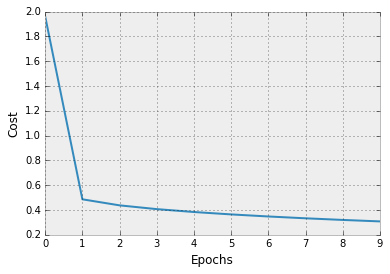

In [11]:
plt.plot( range( len(softmax_reg.costs) ), softmax_reg.costs )
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [12]:
 y_pred = softmax_reg.predict(X)
accuracy = np.sum( y_pred == y ) / y.shape[0]
accuracy

0.88666666666666671

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit( X, y )
y_pred = log_reg.predict(X)
accuracy_score( y_true = y, y_pred = y_pred )

0.92666666666666664

## Reference

- [Sebastian Raschka - Softmax Regression](http://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/bonus/softmax-regression.ipynb)
- [TensorFlow - Softmax Regression](https://www.tensorflow.org/versions/r0.9/tutorials/mnist/beginners/index.html)